In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd

In [2]:
categories=os.listdir("./Images")
categories

['Cats', 'Dogs', 'Horses']

# Structuring the Images Data

In [3]:
dic={}
count=-1
X=[]
Y=[]
for c in categories:
    if c not in dic:
        count+=1
        dic[c]=count
    
    all_images=os.listdir("./Images/"+c)
    for i in all_images:
        path="./Images/"+c+"/"+i
        
        img=plt.imread(path)
        img=cv2.resize(img,(32,32))
        X.append(img)
        Y.append(dic[c])
    

In [4]:
len(X)

606

In [5]:
X=np.array(X)

In [6]:
X.shape

(606, 32, 32, 3)

In [7]:
X=X.reshape((606,-1))

In [8]:
X.shape

(606, 3072)

In [9]:
y=np.array(Y)

In [10]:
y.shape

(606,)

In [11]:
data=np.hstack((X,y.reshape((-1,1))))

In [12]:
data.shape

(606, 3073)

In [13]:
np.random.shuffle(data)

In [14]:
X=data[:,:-1]
y=data[:,-1]

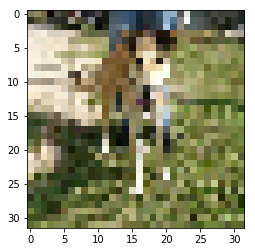

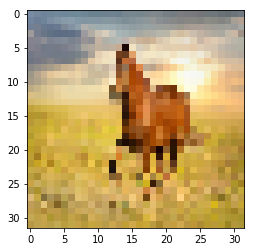

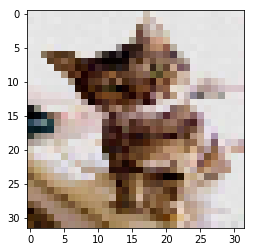

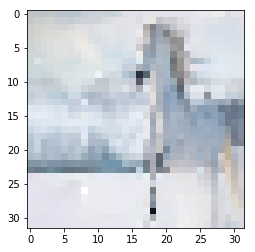

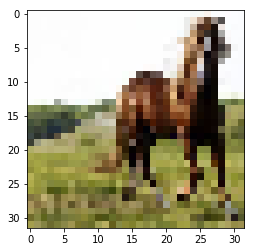

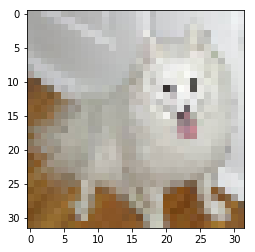

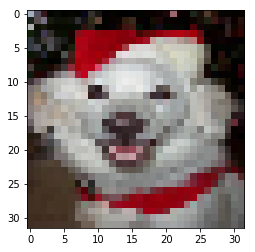

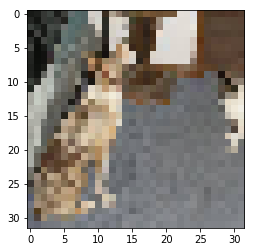

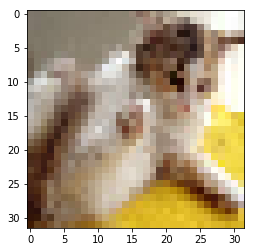

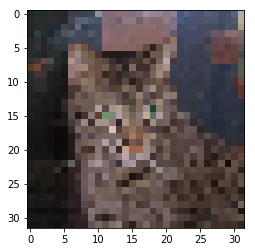

In [15]:
for i in range(10):
    plt.imshow(X[i].reshape((32,32,3)))
    plt.show()

In [32]:
x=X/255

## SVM

In [16]:
class SVM():
    def __init__(self,c=1.0):
        self.w=0.0
        self.b=0.0
        self.c=c
        
    def hinge_loss(self,w,b,x,y):
        loss=.5*np.dot(w,w.T)
        
        for i in range(x.shape[0]):
            ti=y[i]*(np.dot(w,x[i].T)+b)
            loss+=max(0,(self.c)*(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,y,lr=.00001,max_itr=600):
        
        n = X.shape[1]
        m = X.shape[0]
        
        w=np.zeros((1,n))
        b=0.0
        
        losses=[]
        
        for p in range(max_itr):
            l=self.hinge_loss(w,b,X,y)
            losses.append(l)
            
            gradw=np.zeros((1,n))
            gradb=0.0
            
            for i in range(m):
                ti=y[i]*(np.dot(w,X[i].T)+b)
                if (ti<1):
                    gradw-=self.c*y[i]*X[i]
                    gradb-=self.c*y[i]
            
            w=w-lr*gradw
            b=b-lr*gradb
        
        self.w=w
        self.b=b
        
        return w,b,losses

# Convert Data for one-vs-one classifier

In [17]:
M=X.shape[0]
CLASSES=len(np.unique(y))

In [21]:
def classwise(X,y):
    data={}
    
    M=X.shape[0]
    CLASSES=len(np.unique(y))
    
    for i in range(CLASSES):
        data[i]=[]
    
    for i in range(X.shape[0]):
        data[y[i]].append(X[i])
    
    for i in data:
        data[i]=np.array(data[i])
    
    return data

In [22]:
data=classwise(X/255,y)

# Get PairWise Data

In [23]:
def getPairWise(d1,d2):
    l1=np.ones((d1.shape[0],1))
    l2=-1*np.ones((d2.shape[0],1))
    return np.vstack((d1,d2)),np.vstack((l1,l2))

# Train NC2 Classifiers 

In [24]:
def trainSVM():
    svm_classifier={}
    
    for i in range(CLASSES):
        svm_classifier[i]={}
        
        for j in range(i+1,CLASSES):
            l,d=getPairWise(data[i],data[j])
            model=SVM()
            w,b,l=model.fit(l,d)
            
            svm_classifier[i][j]=(w,b)
            plt.plot(l)
            plt.show()
    return svm_classifier

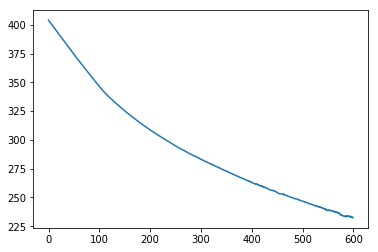

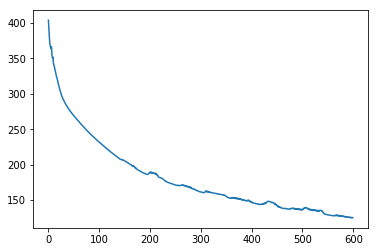

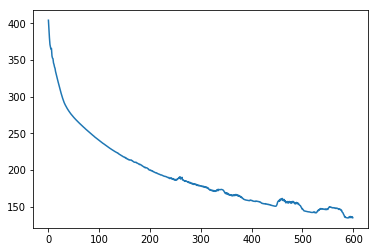

In [25]:
svm_classifier=trainSVM()

# Prediction

In [26]:
def predict(x):
    count=np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            W,b=svm_classifier[i][j]
            z=np.dot(W,x.T)+b
            
            if(z>=0):
                count[i]+=1
                
            else:
                count[j]+=1
    final_pred=np.argmax(count)
    return final_pred
                
                

In [28]:
predict(X[10])

1

In [29]:
dic

{'Cats': 0, 'Dogs': 1, 'Horses': 2}

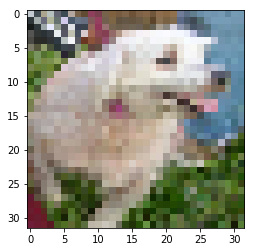

In [31]:
plt.imshow(X[10].reshape((32,32,3)))

In [37]:
def accuracy(X,y):
    y_pred=[]
    for i in range(X.shape[0]):
        y_pred.append(predict(X[i]))
    return (y==np.array(y_pred)).mean()

In [38]:
accuracy(X,y)

0.7656765676567657

# SKlearn

In [39]:
from sklearn import svm

In [42]:
model=svm.SVC(C=.01)
model.fit(X,y)
model.score(X,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [47]:
def accuracy(x,y):
    y_pred=[]
    for i in range(x.shape[0]):
        z=model.predict(x[i].reshape((1,-1)))
        y_pred.append(z[0])
    return (y==np.array(y_pred,dtype='int')).mean()

In [45]:
X[0].shape

(3072,)

In [49]:
accuracy(X,y)

1.0